In [70]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt

In [71]:

#df = pd.read_csv("Data/allcrypto.csv",dtype='object') #read in the csv file
#df = pd.read_csv("Data/allcrypto.csv")
df = pd.read_csv("Data/allcrypto.csv",low_memory=False,parse_dates=True)


In [72]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,4/28/2013,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,4/29/2013,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,4/30/2013,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,5/1/2013,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,5/2/2013,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32


In [73]:
df.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
659368,entcash,ENT,ENTCash,1/6/2018,1408,0.174183,0.194897,0.150645,0.163826,3345710,0.0,0.2979,0.04
659369,entcash,ENT,ENTCash,1/7/2018,1408,0.164768,0.181707,0.163826,0.169468,2164900,0.0,0.3155,0.02
659370,entcash,ENT,ENTCash,1/8/2018,1408,0.174209,0.174209,0.144273,0.161158,1457280,0.0,0.564,0.03
659371,entcash,ENT,ENTCash,1/9/2018,1408,0.162810,0.177575,0.147691,0.156104,3480830,0.0,0.2815,0.03
659372,entcash,ENT,ENTCash,1/10/2018,1408,0.157429,0.163051,0.148058,0.150869,3718410,0.0,0.1875,0.01


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 13 columns):
slug           659373 non-null object
symbol         659373 non-null object
name           659373 non-null object
date           659373 non-null object
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    644847 non-null object
spread         659373 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 65.4+ MB


In [75]:
# I don't need symbol because I have name already,so I will drop it
# In this analysis, it's important to work with date as date objects, so we need to transform it.
# we see from df.info, close_ratio column has either NA'S or missing values.
df1 = df.drop(['symbol'], axis=1) # axis=1 denotes that we are refering to column,not a row.
df1['date'] = pd.to_datetime(df1['date'], format= '%m/%d/%Y')
df1['close_ratio']=pd.to_numeric(df1['close_ratio'],errors='coerce')# errors=coerce puts invalid parsing to NAN.

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 12 columns):
slug           659373 non-null object
name           659373 non-null object
date           659373 non-null datetime64[ns]
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    644844 non-null float64
spread         659373 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 60.4+ MB


In [77]:
df1.median()#only calulates for median data

ranknow          666.000000
open               0.006680
high               0.007732
low                0.005828
close              0.006700
volume           340.000000
market         75216.000000
close_ratio        0.447850
spread             0.000000
dtype: float64

In [78]:
df1_imputed=df1.fillna(df1.median())

In [79]:
df1_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659373 entries, 0 to 659372
Data columns (total 12 columns):
slug           659373 non-null object
name           659373 non-null object
date           659373 non-null datetime64[ns]
ranknow        659373 non-null int64
open           659373 non-null float64
high           659373 non-null float64
low            659373 non-null float64
close          659373 non-null float64
volume         659373 non-null int64
market         659373 non-null float64
close_ratio    659373 non-null float64
spread         659373 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 60.4+ MB


In [80]:
df1_imputed.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,659373.000000,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,6.593730e+05,659373.000000,6.593730e+05
mean,664.808072,1.954633e+02,2.390818e+02,1.582942e+02,1.952336e+02,4.024155e+06,9.494453e+07,0.471751,8.078717e+01
std,376.857132,9.339245e+03,1.215379e+04,7.104065e+03,9.297601e+03,1.419269e+08,2.653153e+09,0.337225,6.194455e+03
min,1.000000,1.000000e-10,1.300000e-10,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000,0.000000e+00
25%,362.000000,4.130000e-04,4.830000e-04,3.550000e-04,4.140000e-04,2.000000e+01,6.706000e+03,0.160800,0.000000e+00
50%,666.000000,6.680000e-03,7.732000e-03,5.828000e-03,6.700000e-03,3.400000e+02,7.521600e+04,0.447850,0.000000e+00
75%,961.000000,9.682200e-02,1.119570e-01,8.445300e-02,9.728600e-02,7.618000e+03,9.043740e+05,0.777800,2.000000e-02
max,1408.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.260000e+11,1.000000,1.770563e+06


In [81]:
df1_imputed['slug'].describe()

count       659373
unique        1400
top       namecoin
freq          1719
Name: slug, dtype: object

In [82]:
top10_rank = [1,2,3,4,5,6,7,8,9,10]
crypto_df = df1[df1_imputed["ranknow"].isin(top10_rank)]

In [83]:
crypto_df.head()

,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88
1,bitcoin,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49
2,bitcoin,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88
3,bitcoin,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17
4,bitcoin,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32


In [84]:
crypto_df.tail()

,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
10126,dash,Dash,2018-01-06,10,1157.09,1279.47,1147.49,1265.03,215058000,9.026110e+09,0.8906,131.98
10127,dash,Dash,2018-01-07,10,1266.43,1394.28,1266.43,1285.43,230576000,9.881510e+09,0.1486,127.85
10128,dash,Dash,2018-01-08,10,1283.36,1320.28,1007.55,1087.75,215239000,1.001620e+10,0.2565,312.73
10129,dash,Dash,2018-01-09,10,1085.75,1134.49,1055.21,1111.86,220569000,8.476040e+09,0.7146,79.28
10130,dash,Dash,2018-01-10,10,1115.48,1117.33,1041.39,1106.36,231944000,8.710310e+09,0.8555,75.94


In [85]:
### Data Visualization and Attribute Relationships


In [86]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import seaborn as sns


In [87]:
years= mdates.YearLocator()
months= mdates.MonthLocator()
yearsFmt= mdates.DateFormatter('%Y')



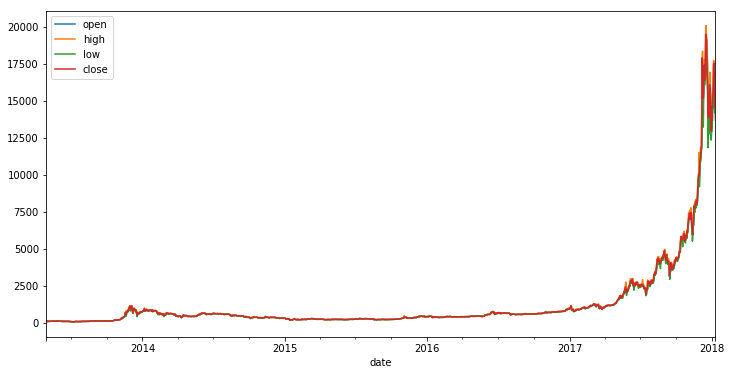

In [88]:
# since Bitcoin is in no 1,lets see the trend from 2013
Bitcoin_price = crypto_df[crypto_df['name']=='Bitcoin']
Bitcoin_price.set_index(['date'],inplace=True)
Bitcoin_price[['open','high','low','close']].plot(figsize=(12,6))
plt.show()


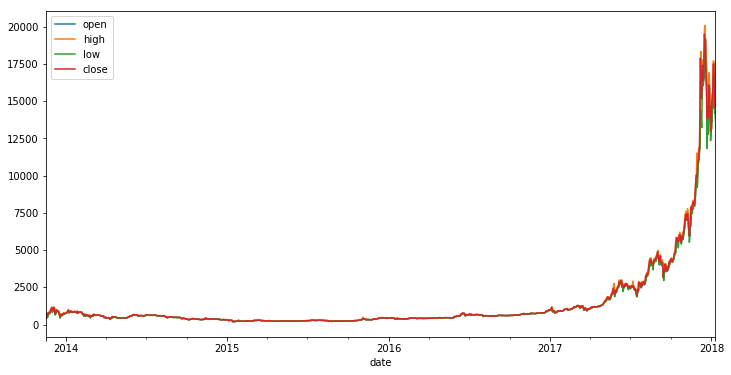

In [95]:
#we saw that the price of bitcoin increased from 2017
Bitcoin_price17 = crypto_df[crypto_df['name']=='Bitcoin'].loc['2017':]
Bitcoin_price17.set_index(['date'],inplace=True)
Bitcoin_price17[['open','high','low','close']].plot(figsize=(12,6))
plt.show()

In [90]:
# Try to find the top 10 crypto curriencies rank
crypto_df[crypto_df['ranknow'] <= 10].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2         [Ethereum]
3           [Ripple]
4     [Bitcoin Cash]
5          [Cardano]
6         [Litecoin]
7              [NEM]
8             [IOTA]
9          [Stellar]
10            [Dash]
Name: name, dtype: object

In [91]:
# know more about the top 10 coins
Bitcoin = crypto_df[crypto_df['name']=='Bitcoin'].loc['2017':]
Ethereum = crypto_df[crypto_df['name']=='Ethereum'].loc['2017':]
Ripple = crypto_df[crypto_df['name']=='Ripple'].loc['2017':]
Bitcoin_cash = crypto_df[crypto_df['name']=='Bitcoin Cash'].loc['2017':]
Cardano = crypto_df[crypto_df['name']=='Cardano'].loc['2017':]
Litecoin = crypto_df[crypto_df['name']=='Litecoin'].loc['2017':]
NEM = crypto_df[crypto_df['name']=='NEM'].loc['2017':]
IOTA = crypto_df[crypto_df['name']=='IOTA'].loc['2017':]
Stellar = crypto_df[crypto_df['name']=='Stellar'].loc['2017':]
Dash = crypto_df[crypto_df['name']=='Dash'].loc['2017':]



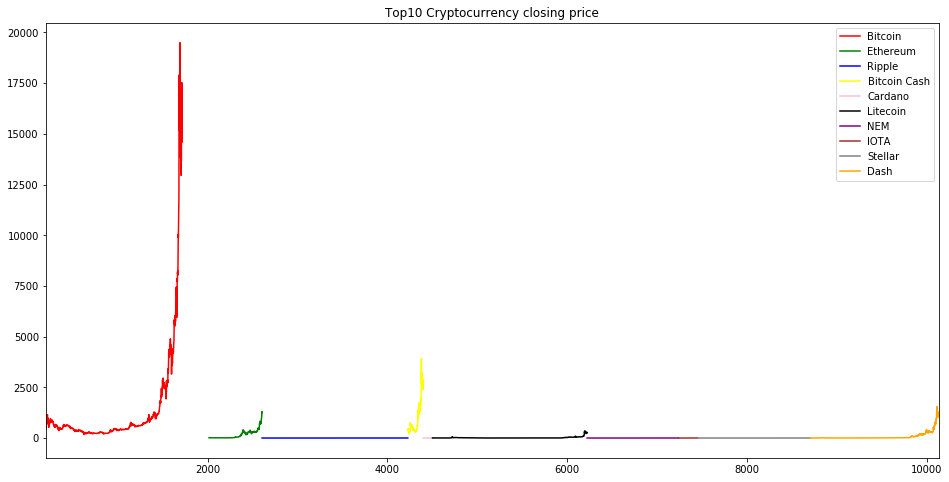

In [92]:
# Let's see the trend for closing price
plt.figure(figsize=(16,8))
(Bitcoin['close']).plot(color='red', label='Bitcoin')
(Ethereum['close']).plot(color='green', label='Ethereum')
(Ripple['close']).plot(color='blue', label='Ripple')
(Bitcoin_cash['close']).plot(color='yellow', label='Bitcoin Cash')
(Cardano['close']).plot(color='pink', label='Cardano')
(Litecoin['close']).plot(color='black', label='Litecoin')
(NEM['close']).plot(color='purple', label='NEM')
(IOTA['close']).plot(color='brown', label='IOTA')
(Stellar['close']).plot(color='grey', label='Stellar')
(Dash['close']).plot(color='orange', label='Dash')
plt.legend()
plt.title('Top10 Cryptocurrency closing price')
plt.show()

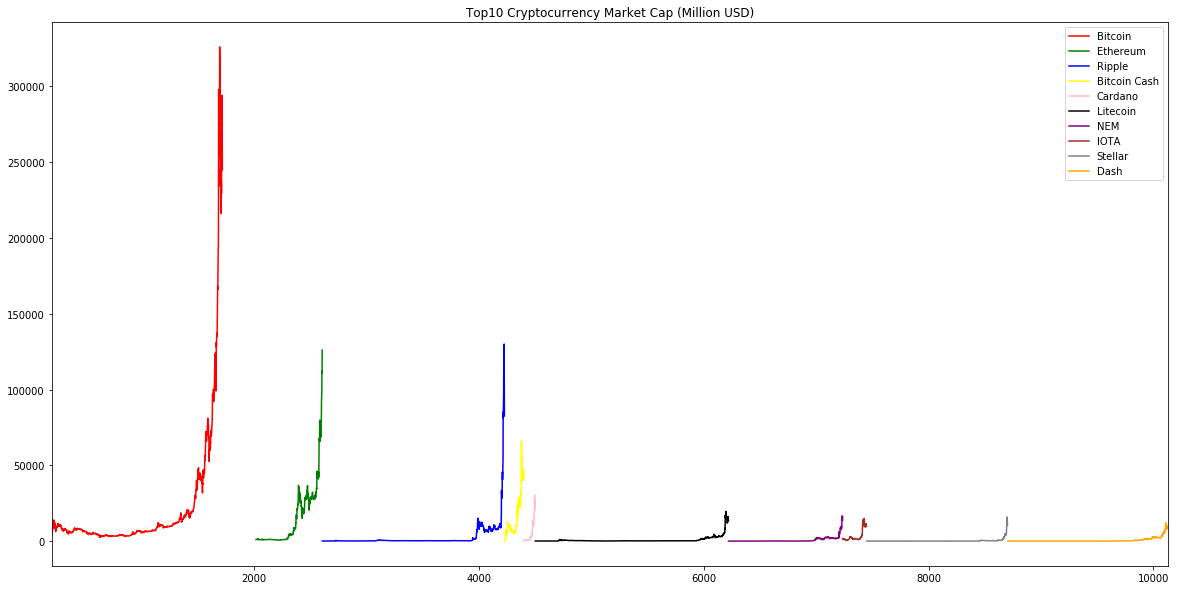

In [93]:
# draw pic of MarketCap
plt.figure(figsize=(20,10))
(Bitcoin['market']/1000000).plot(color='red', label='Bitcoin')
(Ethereum['market']/1000000).plot(color='green', label='Ethereum')
(Ripple['market']/1000000).plot(color='blue', label='Ripple')
(Bitcoin_cash['market']/1000000).plot(color='yellow', label='Bitcoin Cash')
(Cardano['market']/1000000).plot(color='pink', label='Cardano')
(Litecoin['market']/1000000).plot(color='black', label='Litecoin')
(NEM['market']/1000000).plot(color='purple', label='NEM')
(IOTA['market']/1000000).plot(color='brown', label='IOTA')
(Stellar['market']/1000000).plot(color='grey', label='Stellar')
(Dash['market']/1000000).plot(color='orange', label='Dash')
plt.legend()
plt.title('Top10 Cryptocurrency Market Cap (Million USD)')
#Bitcoin.set_index(['date'],inplace=True)
plt.show()